# Assignment #2 - Classification

<font color="blue"> Mohamad Aboufoul </font>

# I. Overview

The objective of this assignment is to implement 4 types of classification on two sets of data, each with a variety of possible classes. The samples in each data set are labeled according to their corresponding class, making the classification algorithms possible.

This assignment involves the implementation of the Perceptron Algorithm (Pocket Algorithm), Quantitative Discriminant Analysis, Linear Discriminant Analysis, and Logistic Regression to classify the data. All of these work for the classification of multiple classes except for the Perceptron Algorithm, which only has binary output. Regarding the training of the algorithms, the Perceptron Algorithm and Logistic Regression require an alpha value and a maximum number of iterations to go through while training each model. The QDA and LDA do not require either of these. 

These models were trained using 5-fold cross validation, in which each data set was shuffled and split into 5 partitions. Using a loop that iterated through each of these partitions, each was treated as a test set, and the other 4 partitions were looped through again, this time treating each partition as a validation set while the other 3 were treated as the training set. Through this, the best model for each given test set was found via its corresponding accuracy **[(Number of times the prediction (Y) matched the target value (T)) / (Total number of predictions)]**. The test partition that yielded the best accuracy was selected as the best model, with the training set now incorporating **BOTH** the corresponding training and validation set.

Finally, each model was also evaluated using the **precision (The accuracy of positive predictions)** and the **specificity (The true negative rate)**. However, only the first 2 rows and columns (classes 0 and 1 / classes -1 and 1) were used in this measure, with the number of samples from class 1 classified as class 1 representing the **true positive**, the number of those from class 0 or -1 classified as 1 representing the **false positive**, and the number of those from class 0 or -1 classified as 0 or -1, respectively, representing the **true negative**.

# II. Data

Two data sets used: 
- Iris Data set (https://archive.ics.uci.edu/ml/datasets/iris)
- Glass Data set (https://www.kaggle.com/uciml/glass)

The first data set used in this assignment is the iris data set, which consists of 150 flowers classified as Iris-setosa, Iris-versicolor, and Iris-virginica. The features of this data set are the Sepal Length, Sepal Width, Petal Length and Petal Width of each sample, all measured in centimeters.

The second data set used in this assignment is a glass data set, which classifies samples according to glass type. Much modification was needed for this set, with a reduction to 155 samples, the removal of many features (which caused errors in various algorithms due to zero values and high values that impacted exponential calculations), and the reduction to only 3 classes being represented. The classes are Float Processed Building Windows, Non-float Processed Building Windows, and Float Processed Vehicle Windows. The features that were kept in this data set were the refractive index (RI) and the weight percentages of Sodium Oxide (Na), Aluminum Oxide (Al), and Calcium Oxide (Ca).

Data tables of each set can be seen below along with corresponding visualizations.

## II-a. Iris Data Set



In [274]:
import csv
import pandas as pd
import os
import numpy as np

pd.set_option('display.max_rows', 10) #Limits number of rows displayed below

#Displays csv file of the features
irisData = pd.read_csv('Iris.csv')
irisData

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


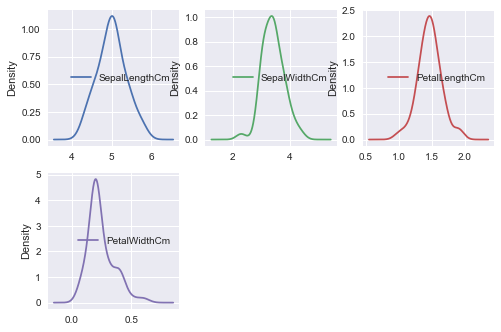

In [275]:
import matplotlib.pyplot as plt
import pandas as pd

irisSetosaData = pd.read_csv('Iris.csv', nrows = 50, usecols=[1,2,3,4])
irisSetosaData.plot(kind='density', subplots=True, layout=(2,3), sharex=False)

plt.show()

 - Above are the density plots for each of the 4 features in the Iris Setosa class
 - All of the features appear to have a bell-shaped distribution with the exception of the Petal Width
  - The Petal Width appears to have a distribution that is slightly skewed right
 - Finally, the variance appears to be the greatest on the Sepal Length

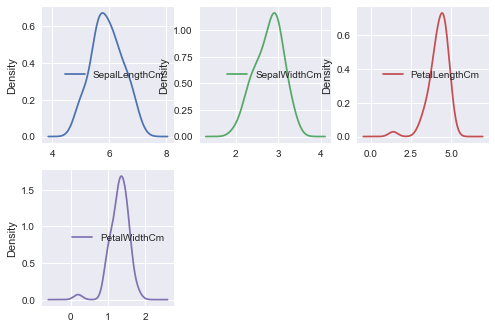

In [276]:
import matplotlib.pyplot as plt
import pandas as pd

irisVersicolorData = pd.read_csv('Iris.csv', skiprows = 50, nrows = 50, usecols=[1,2,3,4], names = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])
irisVersicolorData.plot(kind='density', subplots=True, layout=(2,3), sharex=False)

plt.show()

 - Above are the density plots for each of the 4 features in the Iris Versicolor class
 - The Sepal Length and Width to have moderately bell-shaped distributions while the Petal Length and Width appear to have distributions with a slight skew to the left
 - Finally, the variances appear to be significantly greater for the Sepal Length and Width than they are for the Petal Length and Width

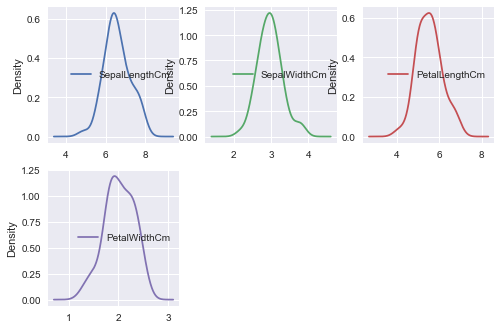

In [277]:
import matplotlib.pyplot as plt
import pandas as pd

irisVirginicaData = pd.read_csv('Iris.csv', skiprows = 100, nrows = 50, usecols=[1,2,3,4],  names = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])
irisVirginicaData.plot(kind='density', subplots=True, layout=(2,3), sharex=False)

plt.show()

 - Above are the density plots for each of the 4 features in the Iris Virginica class
 - All appear to have moderately bell-shaped distributions
 - The variance for the Petal Width appears to be much greater than that of the other 3 features, which are much more similar to one another

## II-b. Glass Data Set


In [278]:
pd.set_option('display.max_rows', 10) #Limits number of rows displayed below

#Displays csv file of the features
glassData = pd.read_csv('glass.csv')
glassData

,RI,Na,Al,Ca,Type
0,1.52101,13.64,1.10,8.75,BuildWindows-Float
1,1.51761,13.89,1.36,7.83,BuildWindows-Float
2,1.51618,13.53,1.54,7.78,BuildWindows-Float
3,1.51766,13.21,1.29,8.22,BuildWindows-Float
4,1.51742,13.27,1.24,8.07,BuildWindows-Float
...,...,...,...,...,...
150,1.51776,13.53,1.52,8.79,VehicleWindows-Float
151,1.51796,13.50,1.63,8.81,VehicleWindows-Float
152,1.51832,13.33,1.54,8.99,VehicleWindows-Float
153,1.51934,13.64,0.75,8.89,VehicleWindows-Float


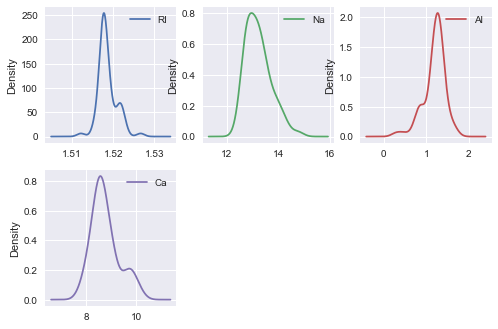

In [279]:
import matplotlib.pyplot as plt
import pandas as pd

buildWindowsFloatData = pd.read_csv('glass.csv', nrows = 66, usecols=[0,1,2,3])
buildWindowsFloatData.plot(kind='density', subplots=True, layout=(2,3), sharex=False)

plt.show()

 - Above are the density plots for each of the 4 features in the Float Processed Building Windows class
 - The Refractive Index, Sodium Oxide weight %, and Calcium Oxide weight % appear to have distributions slightly skewed right
  - The Aluminum Oxide weight % appears to be slightly skewed left
 - The Sodium Oxide weight % appears to have the greatest variance

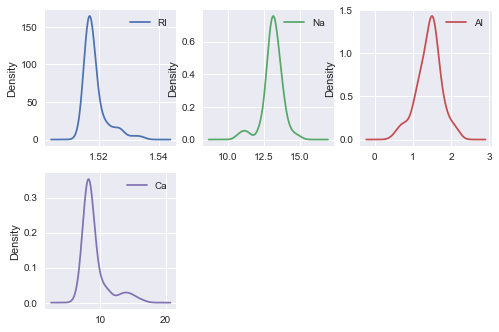

In [304]:
import matplotlib.pyplot as plt
import pandas as pd

buildWindowsNonFloatData = pd.read_csv('glass.csv', skiprows = 66, nrows = 72, usecols=[0,1,2,3], names = ['RI', 'Na', 'Al', 'Ca'])
buildWindowsNonFloatData.plot(kind='density', subplots=True, layout=(2,3), sharex=False)

plt.show()

 - Above are the density plots for each of the 4 features in the Non-Float Processed Building Windows class
 - The RI and Ca features appear to have distributions skewed to the right whereas the Na feature appears to be skewed to the left
  - The Al feature appears to be moderately bell-shaped in its distribution
 - Finally, the variance appears to be the greatest for the Al feature distribution

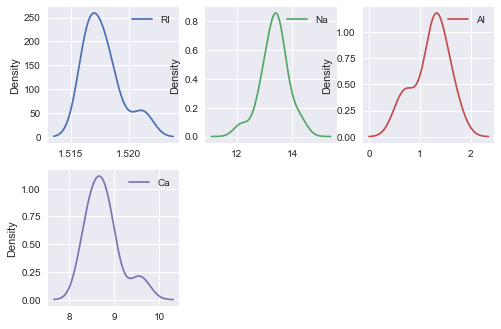

In [305]:
import matplotlib.pyplot as plt
import pandas as pd

vehicleWindowsFloatData = pd.read_csv('glass.csv', skiprows = 138, nrows = 17, usecols=[0,1,2,3], names = ['RI', 'Na', 'Al', 'Ca'])
vehicleWindowsFloatData.plot(kind='density', subplots=True, layout=(2,3), sharex=False)

plt.show()

 - Above are the density plots for each of the 4 features in the Float Processed Vehicle Windows class
 - The RI and Ca distributions appear to be slightly skewed to the right whereas the Na and Al distributions appear to be skewed to the left
 - All of these features appear to have a greater variance for this class than they did for the other classes

# III. Methods

The superclass *Classifier* was used to help implement the Perceptron (pocket), QDA, LDA, and Logistic Regression classes. It has a common initializer method as well as train and use abstract methods. Additionally, it has an add_ones method to account for a bias from the weight vector (or matrix) in the input (X) data and a normalize method to standardize the input data.

Discussions of each implementation can be seen below, right above each class. The 5-fold cross validation can be seen further below that.

In [283]:
import numpy as np
import pandas as pd
import abc

class Classifier:
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, ):
        self.meanX = None
        self.stdX = None

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)

        # TODO: Finish this normalization
        Xs = (X - self.meanX)/self.stdX
        return Xs

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abc.abstractmethod
    def train(self, X, T):
        pass
    
    @abc.abstractmethod
    def use(self, X):
        pass

- **Perceptron (Pocket) Classifier**
    - The Perceptron algorithm takes in data (X) to train the model. It uses this data to develop a weight matrix (w) which will be used in a dot product with inputed data. The results will go through a step function to determine which class is the most likely associated with each inputed sample.
        - This training also require the input of an alpha and a maximum number of iterations in order to find a model with the lowest possible error. This works similarly to gradient descent
    - The main issue with this algorithm is that it only takes in binary data (-1 or 1). This means that any data to be inputed must be converted as binary data for this classifier to work.
    - The use function returns a list of predicted outputs (Y) by taking the dot product of X and w and then adding the bias of the weight matrix
    - Additionally, there is a function that returns the confusion matrix of the model so that other evaluations like the Precision and Specificity can be calculated

In [284]:
from copy import deepcopy as copy

class Perceptron(Classifier):
    
    def __init__(self, alpha, iterations):
        self.alpha = alpha
        self.iterations = int(iterations)
        
    def compare(self, X, T, w, wp): #Returns 1 if w is better -1 if wp is better
        y = np.sign(X @ w)
        yp = np.sign(X @ wp)

        return 1 if np.sum(y == T) >= np.sum(yp == T) else -1
    
    def train(self, X, T): #Input Xtrain and Ttrain for X and T here
        N = X.shape[0] #Number of samples
        K = T.shape[1] #Number of classes
        self.w = np.zeros((1 + X.shape[1], K)) #1 + the number of features to initialize w
        self.w_pocket = copy(self.w) #Copy of the weight vector
        
        X1 = Classifier.add_ones(self, X) #This allows for a column vector of ones to be added to account for a bias
        X1 = X1.reshape(X1.shape[0], X1.shape[1]) #Converts from vector to matrix (if needed; if already a matrix, keeps it the same)
        
        for i in range(self.iterations):
            converged = True
            #errors = 0
            for k in range(N):
                y = self.w.T @ X1[k,:,None]   #TRANSPOSED w MATRIX HERE!!!!!!!
                if(np.sign(y) != np.sign(T[k])): #USED THE .all() FUNCTION HERE!!!!!!!!!!
                    self.w += self.alpha * T[k] * X1[k].reshape(self.w.shape[0], self.w.shape[1])
                    converged = False
                    if(self.compare(X1, T, self.w, self.w_pocket) > 0): #Pocket algorithm
                        self.w_pocket[:] = self.w[:]
                    
            if(converged):
                print("Converged at: ", i)
                break
                
    def trainNormalized(self, X, T): #Use standardized version of X as input 
        train(self, normalize(X), T)
        
    def confusion_matrix(self, Y, T):
        """
            Y    ndarray
                 predicted labels
            T    ndarray
                 target labels
             
            @cfm DataFrame
                 confusion matrix
        """
    
        if len(Y) != len(T):
            raise ValueError("Wrong prediction and target length!")
    
        classes = np.unique(T)
        n_classes = len(classes)
    
        cfm = pd.DataFrame(np.zeros((n_classes, n_classes)), index=classes, columns=classes, dtype=int)
    
        Tidx = [T == c for c in classes]
        for c in classes:
            pred_idx = Y == c
            cfm.loc[c, :] = [np.sum(np.logical_and(pred_idx, tidx)) for tidx in Tidx]
    
        return cfm
        
    def use(self, X): #Input Xtest for X here
        X = X.reshape(X.shape[0], X.shape[1]) #USED THE ORIGINAL X INSTEAD OF THE X INCLUDING A ONES COLUMN TO CALCULATE w!!!!!!!!!
        #X1 = Classifier.add_ones(self, X) #This allows for a column vector of ones to be added to account for a bias
        #X1 = X1.reshape(X1.shape[0], X1.shape[1]) #Converts from vector to matrix (if needed; if already a matrix, keeps it the same)
        
        self.w = self.w.reshape(self.w.shape[0], self.w.shape[1]) #Converts weight from vector to matrix
        
        Y = np.where((X @ self.w_pocket[1:] + self.w_pocket[0]) >= 0.0, 1, -1) #Builds an array of accuracy of predictions for each sample
                                                                                          #1 for correct prediction, 0 for incorrect prediction
        return Y

- **QDA Classifier**
    - The QDA classifier requires no alpha nor maximum number of iterations when initialized. It only needs the training data including the X input matrix and the T target value matrix
    - This classifier works on multiple classes, so no conversion is necessary
    - For this to work, the mu, sigma, and prior of each class in the training set are found be grouping them into a list of lists and running the calculations on each list (class) within the big list.
        - The determinant and inverse of the sigma are calculated as well as the delta values
        - To find the predicted values (Y), the decision boundary that maximizes the probability of posterior prediction (like in Bayes rule) is run through the equation shown in the use function, and the maximum argument is returned
    - There is also a confusion matrix function that returns the confusion matrix of the model

In [285]:
class QDA(Classifier):
        
    def __init__(self):
        self.mu = []
        self.sigma = []
        self.prior = []
        self.detSigma = []
        self.sigInv = []
        self.d = [] #Will hold delta values
        self.k = 0 #Will hold number of classes
    
    def train(self, X, T):
        N = X.shape[0] #Number of samples
        T = T.reshape(T.shape[0], T.shape[1]) #Converts from vector to matrix (if needed; if already a matrix, keeps it the same)
        self.k = np.unique(T).size #Number of classes
        #print(self.k)
        #print(T)
        
        for i in range(self.k):
            self.mu.append(np.mean(X[(T==1).flat,:], 0))
            self.sigma.append(np.cov(X[(T==1).flat,:].T))
            self.prior.append(np.sum(T == i) / float(N))
            self.detSigma.append(np.linalg.det(self.sigma[-1])) #Determinant of sigma (from newly appended value)
            self.sigInv.append(np.linalg.inv(self.sigma[-1])) #Inverse of sigma (from newly appended value)
        
    def trainNormalized(self, X, T): #Use standardized version of X as input 
        self.train(self.normalize(X), T)
        
    def confusion_matrix(self, Y, T):
        """
            Y    ndarray
                 predicted labels
            T    ndarray
                 target labels
             
            @cfm DataFrame
                 confusion matrix
        """
    
        if len(Y) != len(T):
            raise ValueError("Wrong prediction and target length!")
    
        classes = np.unique(T)
        n_classes = len(classes)
    
        cfm = pd.DataFrame(np.zeros((n_classes, n_classes)), index=classes, columns=classes, dtype=int)
    
        Tidx = [T == c for c in classes]
        for c in classes:
            pred_idx = Y == c
            cfm.loc[c, :] = [np.sum(np.logical_and(pred_idx, tidx)) for tidx in Tidx]
    
        return cfm
        
    def useNormalized(self, X):
        X = (X - self.meanX) / self.stdX
        return self.use(X)
    
    def use(self, X):
            
        for i in range(self.k):
            self.d.append(-0.5 * np.log(self.detSigma[i]) \
                             -0.5 * np.sum( (X - self.mu[i]) @ self.sigInv[i] * (X - self.mu[i]), axis=1) \
                             + np.log(self.prior[i]))
        #print(self.mu)
        #print(self.sigma)
        #print(self.d)
        
        return np.argmax(self.d, axis = 0)

- **LDA Classifier**
    - The LDA classifier is very similar to the QDA classifier in that it requires no alpha nor maximum number of iterations when initialized. It only needs the training data including the X input matrix and the T target value matrix
    - However, it has an advantage of not having to maintain a covariance matrix, making it computationally less expensive
        - This does tend to put it at a disadvantage relative to the QDA, which is much more robust
    - This classifier works on multiple classes, so no conversion is necessary
    - For this to work, the mu, sigma, and prior of each class in the training set are found be grouping them into a list of lists and running the calculations on each list (class) within the big list.
        - The determinant and inverse of the sigma are calculated as well as the delta values
        - To find the predicted values (Y), the decision boundary that maximizes the probability of posterior prediction (like in Bayes rule) is run through the equation shown in the use function, and the maximum argument is returned
    - There is also a confusion matrix function that returns the confusion matrix of the model

In [286]:
class LDA(Classifier):
        
    def __init__(self):
        self.mu = []
        self.sigma = []
        self.prior = []
        self.detSigma = []
        self.sigInv = []
        self.d = [] #Will hold delta values
        self.k = 0 #Will hold number of classes
    
    def train(self, X, T):
        N = X.shape[0] #Number of samples
        T = T.reshape(T.shape[0], T.shape[1]) #Converts from vector to matrix (if needed; if already a matrix, keeps it the same)
        self.k = np.unique(T).size #Number of classes
        #print(self.k)
        #print(T)
        
        for i in range(self.k):
            self.mu.append(np.mean(X[(T==1).flat,:], 0))
            self.sigma.append(np.cov(X[(T==1).flat,:].T))
            self.prior.append(np.sum(T == i) / float(N))
            self.detSigma.append(np.linalg.det(self.sigma[-1])) #Determinant of sigma (from newly appended value)
            self.sigInv.append(np.linalg.inv(self.sigma[-1])) #Inverse of sigma (from newly appended value)
        

        
    def trainNormalized(self, X, T): #Use standardized version of X as input 
        self.train(self.normalize(X), T)
        
    def confusion_matrix(self, Y, T):
        """
            Y    ndarray
                 predicted labels
            T    ndarray
                 target labels
             
            @cfm DataFrame
                 confusion matrix
        """
    
        if len(Y) != len(T):
            raise ValueError("Wrong prediction and target length!")
    
        classes = np.unique(T)
        n_classes = len(classes)
    
        cfm = pd.DataFrame(np.zeros((n_classes, n_classes)), index=classes, columns=classes, dtype=int)
    
        Tidx = [T == c for c in classes]
        for c in classes:
            pred_idx = Y == c
            cfm.loc[c, :] = [np.sum(np.logical_and(pred_idx, tidx)) for tidx in Tidx]
    
        return cfm
    
    def useNormalized(self, X):
        X = (X - self.meanX) / self.stdX
        return self.use(X)
    
    def use(self, X):
            
        for i in range(self.k):
            self.d.append(X @ self.sigInv[i] @ self.mu[i] \
                             -0.5 * self.mu[i].T @ self.sigInv[i] @ self.mu[i] \
                             + np.log(self.prior[i]))
        #print(self.mu)
        #print(self.sigma)
        #print(self.d)
        
        return np.argmax(self.d, axis = 0)

- **Logistice Regression Classifier**
    - The Logistic Regression classifier is similar to the perceptron algorithm in that it takes in an alpha and maximum number of iterations as parameters when initialized
    - The main difference is that it uses a softmax function instead of a step function when determining which class is most likely to be attributed to a given sample after training the model
    - Additionally, its training need not be binary, so it can handle many more classes than the Perceptron algorithm
    - Thus, the Logistic Regression classifier is much more robust
    - All of the functions found in the perceptron algorithm class can be found below, with the addition of the softmax function

In [287]:
import numpy as np
import pandas as pd

class LogisticRegression(Classifier):
    
    def __init__(self, alpha, iterations):
        self.alpha = alpha
        self.iterations = int(iterations)
    
    def g(self, X, w): #Softmax function
        z = X @ w # This represents K = f(x; w) = Xw
        return np.exp(z) / np.sum(np.exp(z), axis=1, keepdims = True) #axis=1 indicates row sum
    
    def train(self, X, T): #Input Xtrain and Ttrain for X and T here
        N = X.shape[0] #Number of samples
        K = T.shape[1] #Number of classes
        self.w = np.zeros((1 + X.shape[1], K)) #1 + the number of features to initialize w
        
        X1 = Classifier.add_ones(self, X) #This allows for a column vector of ones to be added to account for a bias
        X1 = X1.reshape(X1.shape[0], X1.shape[1]) #Converts from vector to matrix (if needed; if already a matrix, keeps it the same)
        #T = T.reshape(T.shape[0], T.shape[1]) #Converts from vector to matrix (if needed; if already a matrix, keeps it the same)
        
        for step in range(self.iterations): #Iterator
            # TRAINING CODE HERE!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
            self.w += self.alpha * X1.T @ (T - self.g(X1, self.w)) #Not sure how to use Ttrain here instead of T
        
    def trainNormalized(self, X, T): #Use standardized version of X as input 
        train(self, normalize(X), T)
        
    def confusion_matrix(self, Y, T):
        """
            Y    ndarray
                 predicted labels
            T    ndarray
                 target labels

            @cfm DataFrame
                 confusion matrix
        """
        Y = np.argmax(Y, axis = 1)
        T = np.argmax(T, axis = 1)
        
        if len(Y) != len(T):
            raise ValueError("Wrong prediction and target length!")
        
        classes = np.unique(T)
        n_classes = len(classes)

        cfm = pd.DataFrame(np.zeros((n_classes, n_classes)), index=classes, columns=classes, dtype=int)
        
        T_list = T.tolist()
        Y_list = Y.tolist()
        
        Tidx = [T == c for c in classes]
        for c in classes:
            pred_idx = Y == c
            cfm.loc[c, :] = [np.sum(np.logical_and(pred_idx, tidx)) for tidx in Tidx]

        return cfm
        
    def useNormalized(self, X):
        X = (X - self.meanX) / self.stdX
        return self.use(X)
    
    def use(self, X): #Input Xtest for X here
        X1 = Classifier.add_ones(self, X) #This allows for a column vector of ones to be added to account for a bias
        X1 = X1.reshape(X1.shape[0], X1.shape[1]) #Converts from vector to matrix (if needed; if already a matrix, keeps it the same)
        
        #X1t = np.hstack((np.ones((X1.shape[0],1)), X1))
        Y = self.g(X1, self.w) #Calculates Y using the softmax function
        
        return Y

- **Cross Validation**
    - Cross validation involves splitting a data set into a number of partitions, and setting aside a partition to be used as a test set. For this assignment, each data set was split into 5 partitions.
    - Once split, a loop iterated through each partition, treating each as the test set for a model at a time
        - The remaining 4 partitions were iterated over as well, with each partition being treated as a validation set, while the other 3 were treated as training data
        - 4 models were thus trained for each of the 5 test partitions using each of the classifiers. The model with the highest accuracy was assigned to the corresponding test partition
        - From there, the test set that had the highest accuracy had the corresponding partitions used as training data to train another model (in which the validation set was now used as part of the training data)
    - **WHILE THIS WASN'T INCORPORATED AS A FUNCTION FOR EACH CLASS, IT WAS DONE MANUALLY DOWN BELOW. PLEASE NOTE THAT THE CROSS VALIDATION FOR EACH DATA SET CAN TAKE UP TO 5 MINUTES TO RUN**

# IV - Results

The data from the iris data set needed to be modified to work for each corresponding classifier
- For this to work, 3 different versions of the data needed to be produced
- The originalIrisData held the iris dataset (with each class given a unique number) and was used directly in the QDA and LDA models
- The irisData held the iris dataset in which the class column was replaced with 3 columns (1 for each class) which contained a 1 in the column corresponding to the unique class number. This was used in the Logistic Regression model
- The binaryIrisData held a modified version of the iris dataset in which the class with the unique number 1 was kept as 1, while all the others were converted to -1. This was used in the Perceptron Algorithm model
- Each dataset was then shuffled using np.random.permutation (WHICH MADE SURE THAT EACH DATASET WAS SHUFFLED THE SAME WAY PER CROSS VALIDATION RUN, TO ENSURE COMPARABLE RESULTS)

The results of the cross-validation can be seen below (with the best result for each test set per model printed out), followed by the confusion matrix of each finalized model, followed by visualizations of each finalized model. Finally, you can find the 2 other evaluations used for each model below that (the Precision and Specificity)

**Parameter Choice: ** For the Perceptron and Logistic Regression models, I chose to use 5 alphas (0.01, 0.02, 0.04, 0.05, and 0.07). I kept the maximum number of iterations the same for each pair at 1000 to have comparable results. Anything more would have resulted in even LONGER runtime  **<font color="red">(WHICH IS CURRENTLY ABOUT 5 MINUTES PER CROSS VALIDATION)</font>**.

** <font color="red"> NOTE: THE RESULTS LISTED ARE BASED ON THE LATEST RUN. BECAUSE OF THE SHUFFLING, THEY WILL CHANGE IF YOU RUN THEM AGAIN. </font>**

In [288]:
import numpy as np
import pandas as pd
from copy import deepcopy

irisData = pd.read_csv('Iris.csv')
flowerDictionary = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
irisData['Species'] = irisData['Species'].apply(lambda x: flowerDictionary[x])

originalIrisData = irisData #Keeps original iris data without the get dummies

irisData = pd.concat([irisData.iloc[:, 0:5],
                     pd.get_dummies(irisData.loc[:, 'Species'])],
                     axis = 1)  #Generates a 1 in the column of the corresponding class of the flower according to its data

irisData = irisData.iloc[:, [1,2,3,4,5,6,7]].as_matrix() #To be used in Logistic Regression
originalIrisData = originalIrisData.iloc[:, [1,2,3,4,5]].as_matrix()  #To be used in QDA and LDA

binaryIrisData = deepcopy(originalIrisData)
binaryIrisData[binaryIrisData[:,4] != 1, 4] = -1  #To be used in Perceptron Algorithm; Treats Iris-versicolor as 1 and anything else as -1

randomIndices = np.random.permutation(irisData.shape[0]) #Holds randomized indices to use for shuffling the data

#Shuffles the datasets accordingly (NOTE: THE SHUFFLE WILL ONLY BE CONSISTENT PER UNIQUE RUN; IT WILL NOT BE THE SAME IF RUN MULTIPLE TIMES)
irisData = irisData[randomIndices]
originalIrisData = originalIrisData[randomIndices]
binaryIrisData = binaryIrisData[randomIndices]

#### 5-fold Cross Validation for the Iris Dataset

In [289]:
nfold = 0
kfolds = 5
resultsLogistic, testErrorsLogistic, finalResultsLogistic = [], [], []
resultsQDA, testErrorsQDA, finalResultsQDA = [], [], []
resultsLDA, testErrorsLDA, finalResultsLDA = [], [], []
resultsPerceptron, testErrorsPerceptron, finalResultsPerceptron = [], [], []
inputValues = [[0.01, 1000], [0.02, 1000], [0.04, 1000], [0.05, 1000], [0.07,1000]] #alphas and number of iterations (respectively)


partitionsLogistic = np.split(irisData, 5)
partitionsQDA = np.split(originalIrisData, 5)
partitionsLDA = np.split(originalIrisData, 5)
partitionsPerceptron = np.split(binaryIrisData, 5)

for i in range(kfolds): #Loops through each fold
    resultsLogistic = [] #reinitialize results array (make it empty)
    resultsQDA = [] #reinitialize results array (make it empty)
    resultsLDA = [] #reinitialize results array (make it empty)
    resultsPerceptron = [] #reinitialize results array (make it empty)
    
    #Sets the test set partitions
    irisLogistic_test = partitionsLogistic[i] #Each partition will be treated as the test set at some point
    irisQDA_test = partitionsQDA[i] #Each partition will be treated as the test set at some point
    irisLDA_test = partitionsLDA[i] #Each partition will be treated as the test set at some point
    irisPerceptron_test = partitionsPerceptron[i] #Each partition will be treated as the test set at some point
    for j in range(kfolds): #Loops through each fold AND SKIPS any fold equal to the current test partition
        if(i != j):
            #Sets validation set equal to a partition NOT equal to the test partition
            irisLogistic_validation = partitionsLogistic[j]
            irisQDA_validation = partitionsQDA[j]
            irisLDA_validation = partitionsLDA[j]
            irisPerceptron_validation = partitionsPerceptron[j]
            
            #Sets the train set equal to the partitions the are NOT the test or validation sets
            irisLogistic_train = [x for k, x in enumerate(partitionsLogistic) if (k != j and k != i)]
            irisLogistic_train = np.concatenate((irisLogistic_train[0], irisLogistic_train[1], irisLogistic_train[2]), axis = 0)
            irisQDA_train = [x for k, x in enumerate(partitionsQDA) if (k != j and k != i)]
            irisQDA_train = np.concatenate((irisQDA_train[0], irisQDA_train[1], irisQDA_train[2]), axis = 0)
            irisLDA_train = [x for k, x in enumerate(partitionsLDA) if (k != j and k != i)]
            irisLDA_train = np.concatenate((irisLDA_train[0], irisLDA_train[1], irisLDA_train[2]), axis = 0)
            irisPerceptron_train = [x for k, x in enumerate(partitionsPerceptron) if (k != j and k != i)]
            irisPerceptron_train = np.concatenate((irisPerceptron_train[0], irisPerceptron_train[1], irisPerceptron_train[2]), axis = 0)
            
            
            for z in range(len(inputValues)):
                currentAlpha = inputValues[z][0]
                currentNumberOfIterations = inputValues[z][1]
                testPartitionIndex = i
                validationPartitionIndex = j
                
                #Initializing and obtaining training data for each of the 4 models
                clfLogistic = LogisticRegression(currentAlpha, currentNumberOfIterations)
                clfQDA = QDA()
                clfLDA = LDA()
                clfPerceptron = Perceptron(currentAlpha, currentNumberOfIterations)
                
                X_Logistic_train = irisLogistic_train[:, [0,1,2,3]]
                T_Logistic_train = irisLogistic_train[:, [4,5,6]]
                X_QDA_train = irisQDA_train[:, [0,1,2,3]]
                T_QDA_train = irisQDA_train[:, [4]]
                X_LDA_train = irisLDA_train[:, [0,1,2,3]]
                T_LDA_train = irisLDA_train[:, [4]]
                X_Perceptron_train = irisPerceptron_train[:, [0,1,2,3]]
                T_Perceptron_train = irisPerceptron_train[:, [4]]
                
                #Treat the validation set as the test set in the inner loop to determine which training set is the best
                X_Logistic_validation = irisLogistic_validation[:, [0,1,2,3]]
                T_Logistic_validation = irisLogistic_validation[:, [4,5,6]]
                X_QDA_validation = irisQDA_validation[:, [0,1,2,3]]
                T_QDA_validation = irisQDA_validation[:, [4]]
                X_LDA_validation = irisLDA_validation[:, [0,1,2,3]]
                T_LDA_validation = irisLDA_validation[:, [4]]
                X_Perceptron_validation = irisPerceptron_validation[:, [0,1,2,3]]
                T_Perceptron_validation = irisPerceptron_validation[:, [4]]
                
                #Training each of the 4 models
                clfLogistic.train(X_Logistic_train, T_Logistic_train)
                clfQDA.train(X_QDA_train, T_QDA_train)
                clfLDA.train(X_LDA_train, T_LDA_train)
                clfPerceptron.train(X_Perceptron_train, T_Perceptron_train)
                
                #Treating validation as our test set for each iteration of inner loop
                predicted_y_Logistic = clfLogistic.use(X_Logistic_validation)
                predicted_y_QDA = clfQDA.use(X_QDA_validation)
                predicted_y_LDA = clfLDA.use(X_LDA_validation)
                predicted_y_Perceptron = clfPerceptron.use(X_Perceptron_validation)
                
                accuracyLogistic = np.sum(predicted_y_Logistic == T_Logistic_validation) / len(predicted_y_Logistic)
                accuracyQDA = np.sum(predicted_y_QDA == T_QDA_validation) / len(predicted_y_QDA)
                accuracyLDA = np.sum(predicted_y_LDA == T_LDA_validation) / len(predicted_y_LDA)
                accuracyPerceptron = np.sum(predicted_y_Perceptron == T_Perceptron_validation) / len(predicted_y_Perceptron)
                
                #The following will append an array of the predicted y array, the Target test set, with the alpha and number of iterations AND the test partition (i) AND the validation partition (j)
                resultsLogistic.append([accuracyLogistic, currentAlpha, currentNumberOfIterations, testPartitionIndex, validationPartitionIndex]) #Appends array of predictions --> results becomes a list of lists
                resultsQDA.append([accuracyQDA, currentAlpha, currentNumberOfIterations, testPartitionIndex, validationPartitionIndex]) #Appends array of predictions --> results becomes a list of lists
                resultsLDA.append([accuracyLDA, currentAlpha, currentNumberOfIterations, testPartitionIndex, validationPartitionIndex]) #Appends array of predictions --> results becomes a list of lists
                resultsPerceptron.append([accuracyPerceptron, currentAlpha, currentNumberOfIterations, testPartitionIndex, validationPartitionIndex]) #Appends array of predictions --> results becomes a list of lists
                
    X_Logistic_test = irisLogistic_test[:, [0,1,2,3]]
    T_Logistic_test = irisLogistic_test[:, [4,5,6]]
    X_QDA_test = irisQDA_test[:, [0,1,2,3]]
    T_QDA_test = irisQDA_test[:, [4]]
    X_LDA_test = irisLDA_test[:, [0,1,2,3]]
    T_LDA_test = irisLDA_test[:, [4]]
    X_Perceptron_test = irisPerceptron_test[:, [0,1,2,3]]
    T_Perceptron_test = irisPerceptron_test[:, [4]]
    
    resultsLogistic = np.array(resultsLogistic)
    resultsQDA = np.array(resultsQDA)
    resultsLDA = np.array(resultsLDA)
    resultsPerceptron = np.array(resultsPerceptron)
    
    bestIndexLogistic = np.argmax(resultsLogistic[:,0])
    bestIndexQDA = np.argmax(resultsQDA[:,0])
    bestIndexLDA = np.argmax(resultsLDA[:,0])
    bestIndexPerceptron = np.argmax(resultsPerceptron[:,0])
    
    currentAlphaLogistic = resultsLogistic[bestIndexLogistic, 1]
    currentAlphaQDA = resultsQDA[bestIndexQDA, 1]
    currentAlphaLDA = resultsLDA[bestIndexLDA, 1]
    currentAlphaPerceptron = resultsPerceptron[bestIndexPerceptron, 1]
    
    currentIterationsLogistic = resultsLogistic[bestIndexLogistic, 2]
    currentIterationsQDA = resultsQDA[bestIndexQDA, 2]
    currentIterationsLDA = resultsLDA[bestIndexLDA, 2]
    currentIterationsPerceptron = resultsPerceptron[bestIndexPerceptron, 2]
    
    bestTestPartitionLogistic = resultsLogistic[bestIndexLogistic, 3]
    bestTestPartitionQDA = resultsQDA[bestIndexQDA, 3]
    bestTestPartitionLDA = resultsLDA[bestIndexLDA, 3]
    bestTestPartitionPerceptron = resultsPerceptron[bestIndexPerceptron, 3]
    
    bestValidationPartitionLogistic = resultsLogistic[bestIndexLogistic, 4]
    bestValidationPartitionQDA = resultsQDA[bestIndexQDA, 4]
    bestValidationPartitionLDA = resultsLDA[bestIndexLDA, 4]
    bestValidationPartitionPerceptron = resultsPerceptron[bestIndexPerceptron, 4]
    
    #Training once again (this time including validation set in training data)
    clfLogisticFinal = LogisticRegression(currentAlphaLogistic, currentIterationsLogistic)
    clfQDAFinal = QDA()
    clfLDAFinal = LDA()
    clfPerceptronFinal = Perceptron(currentAlphaPerceptron, currentIterationsPerceptron)
    
    irisLogistic_train = [x for k, x in enumerate(partitionsLogistic) if (k != i)] #If the index is not the test partition, include in train set
    irisLogistic_train = np.concatenate((irisLogistic_train[0], irisLogistic_train[1], irisLogistic_train[2]), axis = 0)
    irisQDA_train = [x for k, x in enumerate(partitionsQDA) if (k != i)] #If the index is not the test partition, include in train set
    irisQDA_train = np.concatenate((irisQDA_train[0], irisQDA_train[1], irisQDA_train[2]), axis = 0)
    irisLDA_train = [x for k, x in enumerate(partitionsLDA) if (k != i)] #If the index is not the test partition, include in train set
    irisLDA_train = np.concatenate((irisLDA_train[0], irisLDA_train[1], irisLDA_train[2]), axis = 0)
    irisPerceptron_train = [x for k, x in enumerate(partitionsPerceptron) if (k != i)] #If the index is not the test partition, include in train set
    irisPerceptron_train = np.concatenate((irisPerceptron_train[0], irisPerceptron_train[1], irisPerceptron_train[2]), axis = 0)
    
    X_Logistic_train = irisLogistic_train[:, [0,1,2,3]]
    T_Logistic_train = irisLogistic_train[:, [4,5,6]]
    X_QDA_train = irisQDA_train[:, [0,1,2,3]]
    T_QDA_train = irisQDA_train[:, [4]]
    X_LDA_train = irisLDA_train[:, [0,1,2,3]]
    T_LDA_train = irisLDA_train[:, [4]]
    X_Perceptron_train = irisPerceptron_train[:, [0,1,2,3]]
    T_Perceptron_train = irisPerceptron_train[:, [4]]
    
    clfLogisticFinal.train(X_Logistic_train, T_Logistic_train)
    clfQDAFinal.train(X_QDA_train, T_QDA_train)
    clfLDAFinal.train(X_LDA_train, T_LDA_train)
    clfPerceptronFinal.train(X_Perceptron_train, T_Perceptron_train)
    #End of training
    
    #Predicts y for each model using corresponding test set
    final_predicted_y_Logistic = clfLogisticFinal.use(X_Logistic_test)
    final_predicted_y_QDA = clfQDAFinal.use(X_QDA_test)
    final_predicted_y_LDA = clfLDAFinal.use(X_LDA_test)
    final_predicted_y_Perceptron = clfPerceptronFinal.use(X_Perceptron_test)
    
    accuracyLogistic = np.sum(final_predicted_y_Logistic == T_Logistic_test) / len(final_predicted_y_Logistic)
    accuracyQDA = np.sum(final_predicted_y_QDA == T_QDA_test.flat) / len(final_predicted_y_QDA)
    accuracyLDA = np.sum(final_predicted_y_LDA == T_LDA_test.flat) / len(final_predicted_y_LDA)
    accuracyPerceptron = np.sum(final_predicted_y_Perceptron == T_Perceptron_test) / len(final_predicted_y_Perceptron)
    
    finalResultsLogistic.append([accuracyLogistic, currentAlphaLogistic, currentIterationsLogistic, bestTestPartitionLogistic, bestValidationPartitionLogistic]) #First is the first partition for test set, second is second partition for test set, ...
    finalResultsQDA.append([accuracyQDA, currentAlphaQDA, currentIterationsQDA, bestTestPartitionQDA, bestValidationPartitionQDA]) #First is the first partition for test set, second is second partition for test set, ...
    finalResultsLDA.append([accuracyLDA, currentAlphaLDA, currentIterationsLDA, bestTestPartitionLDA, bestValidationPartitionLDA]) #First is the first partition for test set, second is second partition for test set, ...
    finalResultsPerceptron.append([accuracyPerceptron, currentAlphaPerceptron, currentIterationsPerceptron, bestTestPartitionPerceptron, bestValidationPartitionPerceptron]) #First is the first partition for test set, second is second partition for test set, ...
    
    
finalResultsLogistic = np.array(finalResultsLogistic)
finalResultsQDA = np.array(finalResultsQDA)
finalResultsLDA = np.array(finalResultsLDA)
finalResultsPerceptron = np.array(finalResultsPerceptron)

np.set_printoptions(suppress=True)
print("Logistic Results")
print(finalResultsLogistic)
print()
print("QDA Results")
print(finalResultsQDA)
print()
print("LDA Results")
print(finalResultsLDA)
print()
print("Perceptron Results")
print(finalResultsPerceptron)

Logistic Results
[[    0.83333333     0.07        1000.             0.             3.        ]
 [    0.7            0.07        1000.             1.             4.        ]
 [    0.7            0.07        1000.             2.             4.        ]
 [    0.76666667     0.07        1000.             3.             0.        ]
 [    0.83333333     0.07        1000.             4.             0.        ]]

QDA Results
[[    0.23333333     0.01        1000.             0.             3.        ]
 [    0.36666667     0.01        1000.             1.             2.        ]
 [    0.36666667     0.01        1000.             2.             1.        ]
 [    0.33333333     0.01        1000.             3.             2.        ]
 [    0.23333333     0.01        1000.             4.             1.        ]]

LDA Results
[[    0.23333333     0.01        1000.             0.             3.        ]
 [    0.36666667     0.01        1000.             1.             2.        ]
 [    0.36666667   

#### Confusion Matrices for each Model

In [290]:
bestFinalResultLogistic = np.argmax(finalResultsLogistic[:,0])
bestFinalResultQDA = np.argmax(finalResultsQDA[:,0])
bestFinalResultLDA = np.argmax(finalResultsLDA[:,0])
bestFinalResultPerceptron = np.argmax(finalResultsPerceptron[:,0])

irisLogistic_train = [x for k, x in enumerate(partitionsLogistic) if (k != finalResultsLogistic[bestFinalResultLogistic, 3])]
irisLogistic_train = np.concatenate((irisLogistic_train[0], irisLogistic_train[1], irisLogistic_train[2]), axis = 0)
irisLogistic_test = partitionsLogistic[int(finalResultsLogistic[bestFinalResultLogistic,3])]

irisQDA_train = [x for k, x in enumerate(partitionsQDA) if (k != finalResultsQDA[bestFinalResultQDA, 3])]
irisQDA_train = np.concatenate((irisQDA_train[0], irisQDA_train[1], irisQDA_train[2]), axis = 0)
irisQDA_test = partitionsQDA[int(finalResultsQDA[bestFinalResultQDA,3])]

irisLDA_train = [x for k, x in enumerate(partitionsLDA) if (k != finalResultsLDA[bestFinalResultLDA, 3])]
irisLDA_train = np.concatenate((irisLDA_train[0], irisLDA_train[1], irisLDA_train[2]), axis = 0)
irisLDA_test = partitionsLDA[int(finalResultsLDA[bestFinalResultLDA,3])]

irisPerceptron_train = [x for k, x in enumerate(partitionsPerceptron) if (k != finalResultsPerceptron[bestFinalResultPerceptron, 3])]
irisPerceptron_train = np.concatenate((irisPerceptron_train[0], irisPerceptron_train[1], irisPerceptron_train[2]), axis = 0)
irisPerceptron_test = partitionsPerceptron[int(finalResultsPerceptron[bestFinalResultPerceptron,3])]


finalX_Logistic_train = irisLogistic_train[:, [0,1,2,3]]
finalT_Logistic_train = irisLogistic_train[:, [4,5,6]]
finalX_Logistic_test = irisLogistic_test[:, [0,1,2,3]]
finalT_Logistic_test = irisLogistic_test[:, [4,5,6]]

finalX_QDA_train = irisQDA_train[:, [0,1,2,3]]
finalT_QDA_train = irisQDA_train[:, [4]]
finalX_QDA_test = irisQDA_test[:, [0,1,2,3]]
finalT_QDA_test = irisQDA_test[:, [4]]

finalX_LDA_train = irisLDA_train[:, [0,1,2,3]]
finalT_LDA_train = irisLDA_train[:, [4]]
finalX_LDA_test = irisLDA_test[:, [0,1,2,3]]
finalT_LDA_test = irisLDA_test[:, [4]]

finalX_Perceptron_train = irisPerceptron_train[:, [0,1,2,3]]
finalT_Perceptron_train = irisPerceptron_train[:, [4]]
finalX_Perceptron_test = irisPerceptron_test[:, [0,1,2,3]]
finalT_Perceptron_test = irisPerceptron_test[:, [4]]

#Find the confusion matrix of each model
finalClfLogistic = LogisticRegression(finalResultsLogistic[bestFinalResultLogistic, 1], finalResultsLogistic[bestFinalResultLogistic, 2])
finalClfLogistic.train(finalX_Logistic_train, finalT_Logistic_train)
newFinal_predicted_y_Logistic = finalClfLogistic.use(finalX_Logistic_test)

finalClfQDA = QDA()
finalClfQDA.train(finalX_QDA_train, finalT_QDA_train)
newFinal_predicted_y_QDA = finalClfQDA.use(finalX_QDA_test)

finalClfLDA = LDA()
finalClfLDA.train(finalX_LDA_train, finalT_LDA_train)
newFinal_predicted_y_LDA = finalClfLDA.use(finalX_LDA_test)

finalClfPerceptron = Perceptron(finalResultsPerceptron[bestFinalResultPerceptron, 1], finalResultsPerceptron[bestFinalResultPerceptron, 2])
finalClfPerceptron.train(finalX_Perceptron_train, finalT_Perceptron_train)
newFinal_predicted_y_Perceptron = finalClfPerceptron.use(finalX_Perceptron_test)

confusionMatrixLogistic = finalClfLogistic.confusion_matrix(newFinal_predicted_y_Logistic, finalT_Logistic_test)
confusionMatrixQDA = finalClfQDA.confusion_matrix(newFinal_predicted_y_QDA, finalT_QDA_test)
confusionMatrixLDA = finalClfLDA.confusion_matrix(newFinal_predicted_y_LDA, finalT_LDA_test)
confusionMatrixPerceptron = finalClfPerceptron.confusion_matrix(newFinal_predicted_y_Perceptron, finalT_Perceptron_test)

print("Logistic Confusion Matrix")
print(confusionMatrixLogistic)
print()
print("QDA Confusion Matrix")
print(confusionMatrixQDA)
print()
print("LDA Confusion Matrix")
print(confusionMatrixLDA)
print()
print("Perceptron Confusion Matrix")
print(confusionMatrixPerceptron)

Logistic Confusion Matrix
   0   1   2
0  7   0   0
1  0  11   0
2  0   0  12

QDA Confusion Matrix
     0.0  1.0  2.0
0.0    0    0    0
1.0  330  330  240
2.0    0    0    0

LDA Confusion Matrix
     0.0  1.0  2.0
0.0    0    0    0
1.0  330  330  240
2.0    0    0    0

Perceptron Confusion Matrix
      -1.0   1.0
-1.0    15     2
 1.0     4     9


### Plots of Iris Data Results (All 4 Models)

##### Logistic Regression Plot

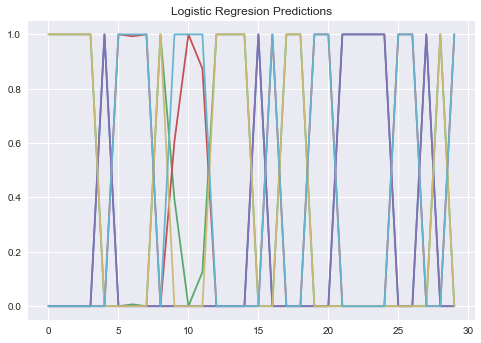

Accuracy:  0.833333333333
Alpha:  0.07
Maximum Number of Iterations:  1000.0


In [291]:
import matplotlib.pyplot as plt
import pandas as pd

plt.plot(newFinal_predicted_y_Logistic)
plt.plot(finalT_Logistic_test)

plt.title("Logistic Regresion Predictions")
plt.show()

print("Accuracy: ", finalResultsLogistic[bestFinalResultLogistic, 0])
print("Alpha: ", finalResultsLogistic[bestFinalResultLogistic, 1])
print("Maximum Number of Iterations: ", finalResultsLogistic[bestFinalResultLogistic, 2])

##### QDA Plot

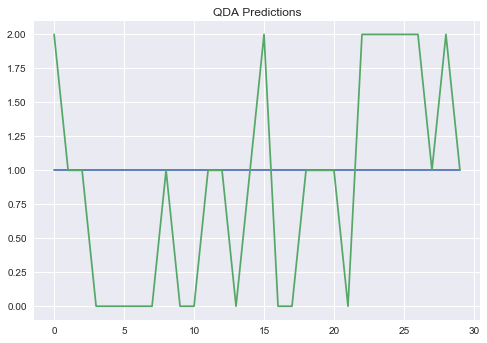

Accuracy:  0.366666666667


In [292]:
import matplotlib.pyplot as plt
import pandas as pd

plt.plot(newFinal_predicted_y_QDA)
plt.plot(finalT_QDA_test)

plt.title("QDA Predictions")
plt.show()

print("Accuracy: ", finalResultsQDA[bestFinalResultQDA, 0])

##### LDA Plot

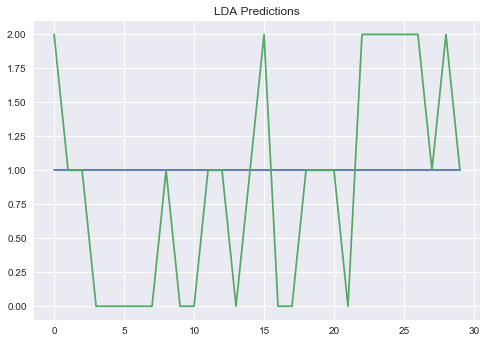

Accuracy:  0.366666666667


In [293]:
import matplotlib.pyplot as plt
import pandas as pd

plt.plot(newFinal_predicted_y_LDA)
plt.plot(finalT_LDA_test)

plt.title("LDA Predictions")
plt.show()

print("Accuracy: ", finalResultsLDA[bestFinalResultLDA, 0])

##### Perceptron Plot

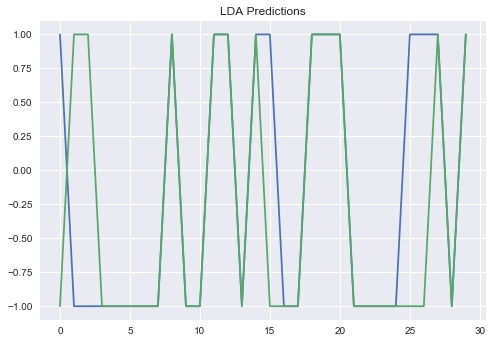

Accuracy:  0.8
Alpha:  0.05
Maximum Number of Iterations:  1000.0


In [294]:
import matplotlib.pyplot as plt
import pandas as pd

plt.plot(newFinal_predicted_y_Perceptron)
plt.plot(finalT_Perceptron_test)

plt.title("LDA Predictions")
plt.show()

print("Accuracy: ", finalResultsPerceptron[bestFinalResultPerceptron, 0])
print("Alpha: ", finalResultsPerceptron[bestFinalResultPerceptron, 1])
print("Maximum Number of Iterations: ", finalResultsPerceptron[bestFinalResultPerceptron, 2])

#### Iris Model Analysis
 - Of the models above, the Logistic Regression had the highest accuracy at approx. 83.3% with an alpha of 0.07. The Perceptron had the second highest at an accuracy of 80% and an alpha of 0.05. 
 - This gives some evidence that the higher alpha may be key to a better model, but it also tells us that the Logistic model was better overall for the iris dataset.
 - The QDA and LDA had the lowest accuracy at approx. 36.67%. For some reason, they yielded the same results, even though the calculations were different in each class.

In [295]:
confusionMatrixLogistic = confusionMatrixLogistic.values
confusionMatrixQDA = confusionMatrixQDA.values
confusionMatrixLDA = confusionMatrixLDA.values
confusionMatrixPerceptron = confusionMatrixPerceptron.values

#Precision (Accuracy of Pos. Predictions) calculations (True positives will be treated as those from class 1 classified as class 1; False positives will be those classified as class 0 (or -1))
#NO OTHER CLASSES WILL BE CONSIDERED
precisionLogistic = float(confusionMatrixLogistic[1][1])/float(confusionMatrixLogistic[1][1] + confusionMatrixLogistic[1][0])
precisionQDA = float(confusionMatrixQDA[1][1])/float(confusionMatrixQDA[1][1] + confusionMatrixQDA[1][0])
precisionLDA = float(confusionMatrixLDA[1][1])/float(confusionMatrixLDA[1][1] + confusionMatrixLDA[1][0])
precisionPerceptron = float(confusionMatrixPerceptron[1][1])/float(confusionMatrixPerceptron[1][1] + confusionMatrixPerceptron[1][0])

print("Precisions")
print("Logistic: ", precisionLogistic)
print("QDA: ", precisionQDA)
print("LDA: ", precisionLDA)
print("Perceptron: ", precisionPerceptron)
print()

#Specificity calculations (True Negative Rate) calculations (True negatives will be treated as those from class 0 classified as class 0; False positives will be those from class 1 classified as class 0 (or -1))
#NO OTHER CLASSES WILL BE CONSIDERED
specificityLogistic = float(confusionMatrixLogistic[0][0])/float(confusionMatrixLogistic[0][0] + confusionMatrixLogistic[1][0])
specificityQDA = float(confusionMatrixQDA[0][0])/float(confusionMatrixQDA[0][0] + confusionMatrixQDA[1][0])
specificityLDA = float(confusionMatrixLDA[0][0])/float(confusionMatrixLDA[0][0] + confusionMatrixLDA[1][0])
specificityPerceptron = float(confusionMatrixPerceptron[0][0])/float(confusionMatrixPerceptron[0][0] + confusionMatrixPerceptron[1][0])

print("Specificities")
print("Logistic: ", specificityLogistic)
print("QDA: ", specificityQDA)
print("LDA: ", specificityLDA)
print("Perceptron: ", specificityPerceptron)

Precisions
Logistic:  1.0
QDA:  0.5
LDA:  0.5
Perceptron:  0.6923076923076923

Specificities
Logistic:  1.0
QDA:  0.0
LDA:  0.0
Perceptron:  0.7894736842105263


#### Evaluation of Models
 - The Precision and Specificity were used on each finalized model as a means of evaluation aside from accuracy.
 - These were derived from the confusion matrices of each model, with the number of those from class 1 classified as class 1 being the true positives, the number of those from class 0 or -1 classified as 1 being the false positives, and the number of those from class 0 or -1 classified as 0 or -1, respectively, being the true negatives.
 - Again, the Logistic Regression model had the highest precision and specificity, followed by the perceptron, followed by the QDA and LDA (which had the same exact results) for the iris dataset.
     - It is odd, however, that the logistic regression model had a confusion matrix with perfect results considering its accuracy wasn't 100%. I'm not sure why this occured, which led to it have a perfect precision and specificity

# My Data Set (Glass Data)

The data from the glass data set needed to be modified to work for each corresponding classifier
- For this to work, 3 different versions of the data needed to be produced
- The originalGlassData held the glass dataset (with each class given a unique number) and was used directly in the QDA and LDA models
- The glassData held the glass dataset in which the class column was replaced with 3 columns (1 for each class) which contained a 1 in the column corresponding to the unique class number. This was used in the Logistic Regression model
- The binaryGlassData held a modified version of the glass dataset in which the class with the unique number 1 was kept as 1, while all the others were converted to -1. This was used in the Perceptron Algorithm model
- Each dataset was then shuffled using np.random.permutation (WHICH MADE SURE THAT EACH DATASET WAS SHUFFLED THE SAME WAY PER CROSS VALIDATION RUN, TO ENSURE COMPARABLE RESULTS)

The results of the cross-validation can be seen below (with the best result for each test set per model printed out), followed by the confusion matrix of each finalized model, followed by visualizations of each finalized model. Finally, you can find the 2 other evaluations used for each model below that (the Precision and Specificity)

**Parameter Choice: ** For the Perceptron and Logistic Regression models, I chose to use 5 alphas (0.01, 0.02, 0.04, 0.05, and 0.07). I kept the maximum number of iterations the same for each pair at 1000 to have comparable results. Anything more would have resulted in even LONGER runtime  **<font color="red">(WHICH IS CURRENTLY ABOUT 5 MINUTES PER CROSS VALIDATION)</font>**.

** <font color="red"> NOTE: THE RESULTS LISTED ARE BASED ON THE LATEST RUN. BECAUSE OF THE SHUFFLING, THEY WILL CHANGE IF YOU RUN THEM AGAIN. </font>**

In [296]:
import numpy as np
import pandas as pd
from copy import deepcopy

glassData = pd.read_csv('glass.csv')
glassDictionary = {'BuildWindows-Float': 0, 'BuildWindows-NonFloat': 1, 'VehicleWindows-Float': 2}
glassData['Type'] = glassData['Type'].apply(lambda x: glassDictionary[x])

originalGlassData = glassData #Keeps original glass data without the get dummies

glassData = pd.concat([glassData.iloc[:, 0:4],
                     pd.get_dummies(glassData.loc[:, 'Type'])],
                     axis = 1)  #Generates a 1 in the column of the corresponding class of the glass according to its data

glassData = glassData.iloc[:, [0,1,2,3,4,5,6]].as_matrix() #To be used in Logistic Regression
originalGlassData = originalGlassData.iloc[:, [0,1,2,3,4]].as_matrix()  #To be used in QDA and LDA

binaryGlassData = deepcopy(originalGlassData)
binaryGlassData[binaryGlassData[:,4] != 1, 4] = -1  #To be used in Perceptron Algorithm; Treats Non-Float Glass Building Windows as 1 and anything else as -1

randomIndices = np.random.permutation(glassData.shape[0]) #Holds randomized indices to use for shuffling the data

#Shuffles the datasets accordingly (NOTE: THE SHUFFLE WILL ONLY BE CONSISTENT PER UNIQUE RUN; IT WILL NOT BE THE SAME IF RUN MULTIPLE TIMES)
glassData = glassData[randomIndices]
originalGlassData = originalGlassData[randomIndices]
binaryGlassData = binaryGlassData[randomIndices]

#### 5-fold Cross Validation for Glass Data

In [297]:
nfold = 0
kfolds = 5
resultsLogistic, testErrorsLogistic, finalResultsLogistic = [], [], []
resultsQDA, testErrorsQDA, finalResultsQDA = [], [], []
resultsLDA, testErrorsLDA, finalResultsLDA = [], [], []
resultsPerceptron, testErrorsPerceptron, finalResultsPerceptron = [], [], []
inputValues = [[0.01, 1000], [0.02, 1000], [0.04, 1000], [0.05, 1000], [0.07,1000]] #alphas and number of iterations (respectively)


partitionsLogistic = np.split(glassData, 5)
partitionsQDA = np.split(originalGlassData, 5)
partitionsLDA = np.split(originalGlassData, 5)
partitionsPerceptron = np.split(binaryGlassData, 5)

for i in range(kfolds): #Loops through each fold
    resultsLogistic = [] #reinitialize results array (make it empty)
    resultsQDA = [] #reinitialize results array (make it empty)
    resultsLDA = [] #reinitialize results array (make it empty)
    resultsPerceptron = [] #reinitialize results array (make it empty)
    
    #Sets the test set partitions
    glassLogistic_test = partitionsLogistic[i] #Each partition will be treated as the test set at some point
    glassQDA_test = partitionsQDA[i] #Each partition will be treated as the test set at some point
    glassLDA_test = partitionsLDA[i] #Each partition will be treated as the test set at some point
    glassPerceptron_test = partitionsPerceptron[i] #Each partition will be treated as the test set at some point
    for j in range(kfolds): #Loops through each fold AND SKIPS any fold equal to the current test partition
        if(i != j):
            #Sets validation set equal to a partition NOT equal to the test partition
            glassLogistic_validation = partitionsLogistic[j]
            glassQDA_validation = partitionsQDA[j]
            glassLDA_validation = partitionsLDA[j]
            glassPerceptron_validation = partitionsPerceptron[j]
            
            #Sets the train set equal to the partitions the are NOT the test or validation sets
            glassLogistic_train = [x for k, x in enumerate(partitionsLogistic) if (k != j and k != i)]
            glassLogistic_train = np.concatenate((glassLogistic_train[0], glassLogistic_train[1], glassLogistic_train[2]), axis = 0)
            glassQDA_train = [x for k, x in enumerate(partitionsQDA) if (k != j and k != i)]
            glassQDA_train = np.concatenate((glassQDA_train[0], glassQDA_train[1], glassQDA_train[2]), axis = 0)
            glassLDA_train = [x for k, x in enumerate(partitionsLDA) if (k != j and k != i)]
            glassLDA_train = np.concatenate((glassLDA_train[0], glassLDA_train[1], glassLDA_train[2]), axis = 0)
            glassPerceptron_train = [x for k, x in enumerate(partitionsPerceptron) if (k != j and k != i)]
            glassPerceptron_train = np.concatenate((glassPerceptron_train[0], glassPerceptron_train[1], glassPerceptron_train[2]), axis = 0)
            
            
            for z in range(len(inputValues)):
                currentAlpha = inputValues[z][0]
                currentNumberOfIterations = inputValues[z][1]
                testPartitionIndex = i
                validationPartitionIndex = j
                
                #Initializing and obtaining training data for each of the 4 models
                clfLogistic = LogisticRegression(currentAlpha, currentNumberOfIterations)
                clfQDA = QDA()
                clfLDA = LDA()
                clfPerceptron = Perceptron(currentAlpha, currentNumberOfIterations)
                
                X_Logistic_train = glassLogistic_train[:, [0,1,2,3]]
                T_Logistic_train = glassLogistic_train[:, [4,5,6]]
                X_QDA_train = glassQDA_train[:, [0,1,2,3]]
                T_QDA_train = glassQDA_train[:, [4]]
                X_LDA_train = glassLDA_train[:, [0,1,2,3]]
                T_LDA_train = glassLDA_train[:, [4]]
                X_Perceptron_train = glassPerceptron_train[:, [0,1,2,3]]
                T_Perceptron_train = glassPerceptron_train[:, [4]]
                
                #Treat the validation set as the test set in the inner loop to determine which training set is the best
                X_Logistic_validation = glassLogistic_validation[:, [0,1,2,3]]
                T_Logistic_validation = glassLogistic_validation[:, [4,5,6]]
                X_QDA_validation = glassQDA_validation[:, [0,1,2,3]]
                T_QDA_validation = glassQDA_validation[:, [4]]
                X_LDA_validation = glassLDA_validation[:, [0,1,2,3]]
                T_LDA_validation = glassLDA_validation[:, [4]]
                X_Perceptron_validation = glassPerceptron_validation[:, [0,1,2,3]]
                T_Perceptron_validation = glassPerceptron_validation[:, [4]]
                
                #Training each of the 4 models
                clfLogistic.train(X_Logistic_train, T_Logistic_train)
                clfQDA.train(X_QDA_train, T_QDA_train)
                clfLDA.train(X_LDA_train, T_LDA_train)
                clfPerceptron.train(X_Perceptron_train, T_Perceptron_train)
                
                #Treating validation as our test set for each iteration of inner loop
                predicted_y_Logistic = clfLogistic.use(X_Logistic_validation)
                predicted_y_QDA = clfQDA.use(X_QDA_validation)
                predicted_y_LDA = clfLDA.use(X_LDA_validation)
                predicted_y_Perceptron = clfPerceptron.use(X_Perceptron_validation)
                
                accuracyLogistic = np.sum(predicted_y_Logistic == T_Logistic_validation) / len(predicted_y_Logistic)
                accuracyQDA = np.sum(predicted_y_QDA == T_QDA_validation) / len(predicted_y_QDA)
                accuracyLDA = np.sum(predicted_y_LDA == T_LDA_validation) / len(predicted_y_LDA)
                accuracyPerceptron = np.sum(predicted_y_Perceptron == T_Perceptron_validation) / len(predicted_y_Perceptron)
                
                #The following will append an array of the predicted y array, the Target test set, with the alpha and number of iterations AND the test partition (i) AND the validation partition (j)
                resultsLogistic.append([accuracyLogistic, currentAlpha, currentNumberOfIterations, testPartitionIndex, validationPartitionIndex]) #Appends array of predictions --> results becomes a list of lists
                resultsQDA.append([accuracyQDA, currentAlpha, currentNumberOfIterations, testPartitionIndex, validationPartitionIndex]) #Appends array of predictions --> results becomes a list of lists
                resultsLDA.append([accuracyLDA, currentAlpha, currentNumberOfIterations, testPartitionIndex, validationPartitionIndex]) #Appends array of predictions --> results becomes a list of lists
                resultsPerceptron.append([accuracyPerceptron, currentAlpha, currentNumberOfIterations, testPartitionIndex, validationPartitionIndex]) #Appends array of predictions --> results becomes a list of lists
                
    X_Logistic_test = glassLogistic_test[:, [0,1,2,3]]
    T_Logistic_test = glassLogistic_test[:, [4,5,6]]
    X_QDA_test = glassQDA_test[:, [0,1,2,3]]
    T_QDA_test = glassQDA_test[:, [4]]
    X_LDA_test = glassLDA_test[:, [0,1,2,3]]
    T_LDA_test = glassLDA_test[:, [4]]
    X_Perceptron_test = glassPerceptron_test[:, [0,1,2,3]]
    T_Perceptron_test = glassPerceptron_test[:, [4]]
    
    resultsLogistic = np.array(resultsLogistic)
    resultsQDA = np.array(resultsQDA)
    resultsLDA = np.array(resultsLDA)
    resultsPerceptron = np.array(resultsPerceptron)
    
    bestIndexLogistic = np.argmax(resultsLogistic[:,0])
    bestIndexQDA = np.argmax(resultsQDA[:,0])
    bestIndexLDA = np.argmax(resultsLDA[:,0])
    bestIndexPerceptron = np.argmax(resultsPerceptron[:,0])
    
    currentAlphaLogistic = resultsLogistic[bestIndexLogistic, 1]
    currentAlphaQDA = resultsQDA[bestIndexQDA, 1]
    currentAlphaLDA = resultsLDA[bestIndexLDA, 1]
    currentAlphaPerceptron = resultsPerceptron[bestIndexPerceptron, 1]
    
    currentIterationsLogistic = resultsLogistic[bestIndexLogistic, 2]
    currentIterationsQDA = resultsQDA[bestIndexQDA, 2]
    currentIterationsLDA = resultsLDA[bestIndexLDA, 2]
    currentIterationsPerceptron = resultsPerceptron[bestIndexPerceptron, 2]
    
    bestTestPartitionLogistic = resultsLogistic[bestIndexLogistic, 3]
    bestTestPartitionQDA = resultsQDA[bestIndexQDA, 3]
    bestTestPartitionLDA = resultsLDA[bestIndexLDA, 3]
    bestTestPartitionPerceptron = resultsPerceptron[bestIndexPerceptron, 3]
    
    bestValidationPartitionLogistic = resultsLogistic[bestIndexLogistic, 4]
    bestValidationPartitionQDA = resultsQDA[bestIndexQDA, 4]
    bestValidationPartitionLDA = resultsLDA[bestIndexLDA, 4]
    bestValidationPartitionPerceptron = resultsPerceptron[bestIndexPerceptron, 4]
    
    #Training once again (this time including validation set in training data)
    clfLogisticFinal = LogisticRegression(currentAlphaLogistic, currentIterationsLogistic)
    clfQDAFinal = QDA()
    clfLDAFinal = LDA()
    clfPerceptronFinal = Perceptron(currentAlphaPerceptron, currentIterationsPerceptron)
    
    glassLogistic_train = [x for k, x in enumerate(partitionsLogistic) if (k != i)] #If the index is not the test partition, include in train set
    glassLogistic_train = np.concatenate((glassLogistic_train[0], glassLogistic_train[1], glassLogistic_train[2]), axis = 0)
    glassQDA_train = [x for k, x in enumerate(partitionsQDA) if (k != i)] #If the index is not the test partition, include in train set
    glassQDA_train = np.concatenate((glassQDA_train[0], glassQDA_train[1], glassQDA_train[2]), axis = 0)
    glassLDA_train = [x for k, x in enumerate(partitionsLDA) if (k != i)] #If the index is not the test partition, include in train set
    glassLDA_train = np.concatenate((glassLDA_train[0], glassLDA_train[1], glassLDA_train[2]), axis = 0)
    glassPerceptron_train = [x for k, x in enumerate(partitionsPerceptron) if (k != i)] #If the index is not the test partition, include in train set
    glassPerceptron_train = np.concatenate((glassPerceptron_train[0], glassPerceptron_train[1], glassPerceptron_train[2]), axis = 0)
    
    X_Logistic_train = glassLogistic_train[:, [0,1,2,3]]
    T_Logistic_train = glassLogistic_train[:, [4,5,6]]
    X_QDA_train = glassQDA_train[:, [0,1,2,3]]
    T_QDA_train = glassQDA_train[:, [4]]
    X_LDA_train = glassLDA_train[:, [0,1,2,3]]
    T_LDA_train = glassLDA_train[:, [4]]
    X_Perceptron_train = glassPerceptron_train[:, [0,1,2,3]]
    T_Perceptron_train = glassPerceptron_train[:, [4]]
    
    clfLogisticFinal.train(X_Logistic_train, T_Logistic_train)
    clfQDAFinal.train(X_QDA_train, T_QDA_train)
    clfLDAFinal.train(X_LDA_train, T_LDA_train)
    clfPerceptronFinal.train(X_Perceptron_train, T_Perceptron_train)
    #End of training
    
    #Predicts y for each model using corresponding test set
    final_predicted_y_Logistic = clfLogisticFinal.use(X_Logistic_test)
    final_predicted_y_QDA = clfQDAFinal.use(X_QDA_test)
    final_predicted_y_LDA = clfLDAFinal.use(X_LDA_test)
    final_predicted_y_Perceptron = clfPerceptronFinal.use(X_Perceptron_test)
    
    accuracyLogistic = np.sum(final_predicted_y_Logistic == T_Logistic_test) / len(final_predicted_y_Logistic)
    accuracyQDA = np.sum(final_predicted_y_QDA == T_QDA_test.flat) / len(final_predicted_y_QDA)
    accuracyLDA = np.sum(final_predicted_y_LDA == T_LDA_test.flat) / len(final_predicted_y_LDA)
    accuracyPerceptron = np.sum(final_predicted_y_Perceptron == T_Perceptron_test) / len(final_predicted_y_Perceptron)
    
    finalResultsLogistic.append([accuracyLogistic, currentAlphaLogistic, currentIterationsLogistic, bestTestPartitionLogistic, bestValidationPartitionLogistic]) #First is the first partition for test set, second is second partition for test set, ...
    finalResultsQDA.append([accuracyQDA, currentAlphaQDA, currentIterationsQDA, bestTestPartitionQDA, bestValidationPartitionQDA]) #First is the first partition for test set, second is second partition for test set, ...
    finalResultsLDA.append([accuracyLDA, currentAlphaLDA, currentIterationsLDA, bestTestPartitionLDA, bestValidationPartitionLDA]) #First is the first partition for test set, second is second partition for test set, ...
    finalResultsPerceptron.append([accuracyPerceptron, currentAlphaPerceptron, currentIterationsPerceptron, bestTestPartitionPerceptron, bestValidationPartitionPerceptron]) #First is the first partition for test set, second is second partition for test set, ...
    
    
finalResultsLogistic = np.array(finalResultsLogistic)
finalResultsQDA = np.array(finalResultsQDA)
finalResultsLDA = np.array(finalResultsLDA)
finalResultsPerceptron = np.array(finalResultsPerceptron)

np.set_printoptions(suppress=True)
print("Logistic Results")
print(finalResultsLogistic)
print()
print("QDA Results")
print(finalResultsQDA)
print()
print("LDA Results")
print(finalResultsLDA)
print()
print("Perceptron Results")
print(finalResultsPerceptron)

C:\Users\Mohammadhia\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':
C:\Users\Mohammadhia\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


Logistic Results
[[    0.41935484     0.02        1000.             0.             3.        ]
 [    0.38709677     0.02        1000.             1.             2.        ]
 [    0.             0.02        1000.             2.             1.        ]
 [    0.32258065     0.01        1000.             3.             0.        ]
 [    0.41935484     0.02        1000.             4.             3.        ]]

QDA Results
[[    0.41935484     0.01        1000.             0.             3.        ]
 [    0.48387097     0.01        1000.             1.             2.        ]
 [    0.48387097     0.01        1000.             2.             1.        ]
 [    0.51612903     0.01        1000.             3.             0.        ]
 [    0.41935484     0.01        1000.             4.             3.        ]]

LDA Results
[[    0.41935484     0.01        1000.             0.             3.        ]
 [    0.48387097     0.01        1000.             1.             2.        ]
 [    0.48387097   

#### Confusion Matrices of Glass Data

In [298]:
bestFinalResultLogistic = np.argmax(finalResultsLogistic[:,0])
bestFinalResultQDA = np.argmax(finalResultsQDA[:,0])
bestFinalResultLDA = np.argmax(finalResultsLDA[:,0])
bestFinalResultPerceptron = np.argmax(finalResultsPerceptron[:,0])

glassLogistic_train = [x for k, x in enumerate(partitionsLogistic) if (k != finalResultsLogistic[bestFinalResultLogistic, 3])]
glassLogistic_train = np.concatenate((glassLogistic_train[0], glassLogistic_train[1], glassLogistic_train[2]), axis = 0)
glassLogistic_test = partitionsLogistic[int(finalResultsLogistic[bestFinalResultLogistic,3])]

glassQDA_train = [x for k, x in enumerate(partitionsQDA) if (k != finalResultsQDA[bestFinalResultQDA, 3])]
glassQDA_train = np.concatenate((glassQDA_train[0], glassQDA_train[1], glassQDA_train[2]), axis = 0)
glassQDA_test = partitionsQDA[int(finalResultsQDA[bestFinalResultQDA,3])]

glassLDA_train = [x for k, x in enumerate(partitionsLDA) if (k != finalResultsLDA[bestFinalResultLDA, 3])]
glassLDA_train = np.concatenate((glassLDA_train[0], glassLDA_train[1], glassLDA_train[2]), axis = 0)
glassLDA_test = partitionsLDA[int(finalResultsLDA[bestFinalResultLDA,3])]

glassPerceptron_train = [x for k, x in enumerate(partitionsPerceptron) if (k != finalResultsPerceptron[bestFinalResultPerceptron, 3])]
glassPerceptron_train = np.concatenate((glassPerceptron_train[0], glassPerceptron_train[1], glassPerceptron_train[2]), axis = 0)
glassPerceptron_test = partitionsPerceptron[int(finalResultsPerceptron[bestFinalResultPerceptron,3])]


finalX_Logistic_train = glassLogistic_train[:, [0,1,2,3]]
finalT_Logistic_train = glassLogistic_train[:, [4,5,6]]
finalX_Logistic_test = glassLogistic_test[:, [0,1,2,3]]
finalT_Logistic_test = glassLogistic_test[:, [4,5,6]]

finalX_QDA_train = glassQDA_train[:, [0,1,2,3]]
finalT_QDA_train = glassQDA_train[:, [4]]
finalX_QDA_test = glassQDA_test[:, [0,1,2,3]]
finalT_QDA_test = glassQDA_test[:, [4]]

finalX_LDA_train = glassLDA_train[:, [0,1,2,3]]
finalT_LDA_train = glassLDA_train[:, [4]]
finalX_LDA_test = glassLDA_test[:, [0,1,2,3]]
finalT_LDA_test = glassLDA_test[:, [4]]

finalX_Perceptron_train = glassPerceptron_train[:, [0,1,2,3]]
finalT_Perceptron_train = glassPerceptron_train[:, [4]]
finalX_Perceptron_test = glassPerceptron_test[:, [0,1,2,3]]
finalT_Perceptron_test = glassPerceptron_test[:, [4]]

#Find the confusion matrix of each model
finalClfLogistic = LogisticRegression(finalResultsLogistic[bestFinalResultLogistic, 1], finalResultsLogistic[bestFinalResultLogistic, 2])
finalClfLogistic.train(finalX_Logistic_train, finalT_Logistic_train)
newFinal_predicted_y_Logistic = finalClfLogistic.use(finalX_Logistic_test)

finalClfQDA = QDA()
finalClfQDA.train(finalX_QDA_train, finalT_QDA_train)
newFinal_predicted_y_QDA = finalClfQDA.use(finalX_QDA_test)

finalClfLDA = LDA()
finalClfLDA.train(finalX_LDA_train, finalT_LDA_train)
newFinal_predicted_y_LDA = finalClfLDA.use(finalX_LDA_test)

finalClfPerceptron = Perceptron(finalResultsPerceptron[bestFinalResultPerceptron, 1], finalResultsPerceptron[bestFinalResultPerceptron, 2])
finalClfPerceptron.train(finalX_Perceptron_train, finalT_Perceptron_train)
newFinal_predicted_y_Perceptron = finalClfPerceptron.use(finalX_Perceptron_test)

confusionMatrixLogistic = finalClfLogistic.confusion_matrix(newFinal_predicted_y_Logistic, finalT_Logistic_test)
confusionMatrixQDA = finalClfQDA.confusion_matrix(newFinal_predicted_y_QDA, finalT_QDA_test)
confusionMatrixLDA = finalClfLDA.confusion_matrix(newFinal_predicted_y_LDA, finalT_LDA_test)
confusionMatrixPerceptron = finalClfPerceptron.confusion_matrix(newFinal_predicted_y_Perceptron, finalT_Perceptron_test)

print("Logistic Confusion Matrix")
print(confusionMatrixLogistic)
print()
print("QDA Confusion Matrix")
print(confusionMatrixQDA)
print()
print("LDA Confusion Matrix")
print(confusionMatrixLDA)
print()
print("Perceptron Confusion Matrix")
print(confusionMatrixPerceptron)

Logistic Confusion Matrix
    0   1  2
0   0   0  0
1  15  13  3
2   0   0  0

QDA Confusion Matrix
     0.0  1.0  2.0
0.0    0    0    0
1.0  310  496  155
2.0    0    0    0

LDA Confusion Matrix
     0.0  1.0  2.0
0.0    0    0    0
1.0  310  496  155
2.0    0    0    0

Perceptron Confusion Matrix
      -1.0   1.0
-1.0    14     3
 1.0     4    10


### Plots of Glass Data Results (All 4 Models)

##### Logistic Regression Plot

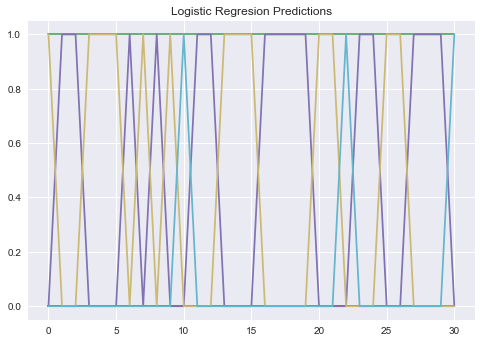

Accuracy:  0.41935483871
Alpha:  0.02
Maximum Number of Iterations:  1000.0


In [299]:
import matplotlib.pyplot as plt
import pandas as pd

plt.plot(newFinal_predicted_y_Logistic)
plt.plot(finalT_Logistic_test)

plt.title("Logistic Regresion Predictions")
plt.show()

print("Accuracy: ", finalResultsLogistic[bestFinalResultLogistic, 0])
print("Alpha: ", finalResultsLogistic[bestFinalResultLogistic, 1])
print("Maximum Number of Iterations: ", finalResultsLogistic[bestFinalResultLogistic, 2])

##### QDA Plot

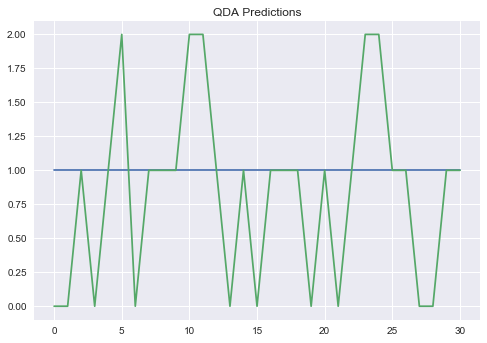

Accuracy:  0.516129032258


In [300]:
import matplotlib.pyplot as plt
import pandas as pd

plt.plot(newFinal_predicted_y_QDA)
plt.plot(finalT_QDA_test)

plt.title("QDA Predictions")
plt.show()

print("Accuracy: ", finalResultsQDA[bestFinalResultQDA, 0])

##### LDA Plot

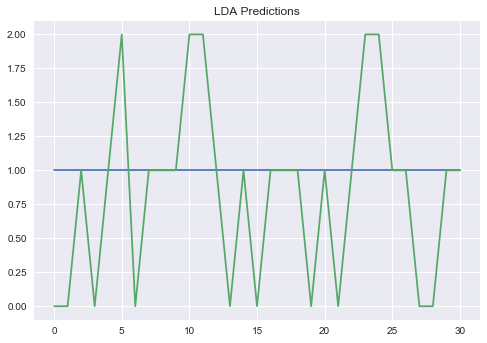

Accuracy:  0.516129032258


In [301]:
import matplotlib.pyplot as plt
import pandas as pd

plt.plot(newFinal_predicted_y_LDA)
plt.plot(finalT_LDA_test)

plt.title("LDA Predictions")
plt.show()

print("Accuracy: ", finalResultsLDA[bestFinalResultLDA, 0])

##### Perceptron Plot

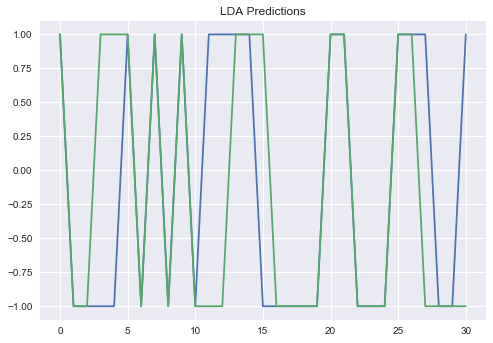

Accuracy:  0.774193548387
Alpha:  0.01
Maximum Number of Iterations:  1000.0


In [302]:
import matplotlib.pyplot as plt
import pandas as pd

plt.plot(newFinal_predicted_y_Perceptron)
plt.plot(finalT_Perceptron_test)

plt.title("LDA Predictions")
plt.show()

print("Accuracy: ", finalResultsPerceptron[bestFinalResultPerceptron, 0])
print("Alpha: ", finalResultsPerceptron[bestFinalResultPerceptron, 1])
print("Maximum Number of Iterations: ", finalResultsPerceptron[bestFinalResultPerceptron, 2])

#### Glass Model Analysis
 - Of the models above, the Logistic Regression had the lowest accuracy at approx. 41.9% with an alpha of 0.02. The Perceptron had the highest at an accuracy of approx. 77.4% and an alpha of 0.01. 
     - This tells us that lower alphas may be the key to better models.
     - However, the Logistic Regression model did not perform well at all on this data set as you can see from the warnings when running the cross-validation on it. Some of the values from the features may have been too large to process efficiently, which might explain why the best model that cross-validation yielded had a low accuracy of 41.9%.
 - The QDA and LDA had the second highest accuracy at approx. 51.6%. For some reason, they yielded the same results, even though the calculations were different in each class.

#### Precision and Specificity for Glass Data

In [303]:
confusionMatrixLogistic = confusionMatrixLogistic.values
confusionMatrixQDA = confusionMatrixQDA.values
confusionMatrixLDA = confusionMatrixLDA.values
confusionMatrixPerceptron = confusionMatrixPerceptron.values

#Precision (Accuracy of Pos. Predictions) calculations (True positives will be treated as those from class 1 classified as class 1; False positives will be those classified as class 0 (or -1))
#NO OTHER CLASSES WILL BE CONSIDERED
precisionLogistic = float(confusionMatrixLogistic[1][1])/float(confusionMatrixLogistic[1][1] + confusionMatrixLogistic[1][0])
precisionQDA = float(confusionMatrixQDA[1][1])/float(confusionMatrixQDA[1][1] + confusionMatrixQDA[1][0])
precisionLDA = float(confusionMatrixLDA[1][1])/float(confusionMatrixLDA[1][1] + confusionMatrixLDA[1][0])
precisionPerceptron = float(confusionMatrixPerceptron[1][1])/float(confusionMatrixPerceptron[1][1] + confusionMatrixPerceptron[1][0])

print("Precisions")
print("Logistic: ", precisionLogistic)
print("QDA: ", precisionQDA)
print("LDA: ", precisionLDA)
print("Perceptron: ", precisionPerceptron)
print()

#Specificity calculations (True Negative Rate) calculations (True negatives will be treated as those from class 0 classified as class 0; False positives will be those from class 1 classified as class 0 (or -1))
#NO OTHER CLASSES WILL BE CONSIDERED
specificityLogistic = float(confusionMatrixLogistic[0][0])/float(confusionMatrixLogistic[0][0] + confusionMatrixLogistic[1][0])
specificityQDA = float(confusionMatrixQDA[0][0])/float(confusionMatrixQDA[0][0] + confusionMatrixQDA[1][0])
specificityLDA = float(confusionMatrixLDA[0][0])/float(confusionMatrixLDA[0][0] + confusionMatrixLDA[1][0])
specificityPerceptron = float(confusionMatrixPerceptron[0][0])/float(confusionMatrixPerceptron[0][0] + confusionMatrixPerceptron[1][0])

print("Specificities")
print("Logistic: ", specificityLogistic)
print("QDA: ", specificityQDA)
print("LDA: ", specificityLDA)
print("Perceptron: ", specificityPerceptron)

Precisions
Logistic:  0.4642857142857143
QDA:  0.6153846153846154
LDA:  0.6153846153846154
Perceptron:  0.7142857142857143

Specificities
Logistic:  0.0
QDA:  0.0
LDA:  0.0
Perceptron:  0.7777777777777778


#### Evaluation of Models
 - The Precision and Specificity were used on each finalized model as a means of evaluation aside from accuracy.
 - These were derived from the confusion matrices of each model, with the number of those from class 1 classified as class 1 being the true positives, the number of those from class 0 or -1 classified as 1 being the false positives, and the number of those from class 0 or -1 classified as 0 or -1, respectively, being the true negatives.
 - The Perceptron model had the highest precision and specificity
 - The QDA and LDA had the second highest precision (with the same exact result), with the Logistic regression model having the lowest
 - The QDA, LDA, and Logistic Regression model had the lowest specificity with all of them being at 0.0

# Conclusions

I think that the Logistic Regression classifier is typically the best of the 4 considering that it can accomodate for more than 2 classes and that it utilizes a weight matrix as well. I think that it's the most robust of the 4.

I faced many challenges throughout this assignment. The implementations of each class and the cross validation took an extroardinary amount of time, and I had difficulty in keeping up with all of the work. I'd like to say that I learned more about the algorithms by actually coding the math, but I still don't. I still have a shaky understanding of each algorithm, even after all the coding that was done. 4 different algorithms in one assignment along with 5-fold cross-validation ALL done manually was just strenuous. Doing so on 2 different datasets didn't really help me understand the material that much better either since it was all done manually; I just felt overwhelmed with the work (as you can see by how long this submission is). I don't think I can keep up with the material at this rate.

I understand that the math is important to know, but I believe that I will only learn the material and concepts better if we are taught using scikit-learn in class and are allowed to use it on the assignments. When I look back at the class notes, I still find myself confused a lot because of the lack of comments, the abbreviations used as variables that I don't understand, and the fact that most of the code was given to us without a step by step guide of how to do it. Additionally, we almost always use dummy data, which is 2 dimensional and can be easily graphed. We rarely go through examples using data like the iris data set that we used here, which has way more than 2 features.

After spending 20 or more hours on this assignment alone, I highly recommend that we use scikit-learn for at least the assignments and that we go through how to use it as a class for the corresponding subject as well.

# Extra Credit

All of the work performed on the Iris dataset was performed on the Glass dataset that I had collected. It can be seen above this paragraph, right below the Iris dataset results.

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run fine after running your codes. 


points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
25 | Data | 
 | 5| Includes description of your data (2 for Iris, 3 for Yours)
 |10| Plots to visualize data (5 for Iris, 5 for yours)
 |10| Reading and analyzing the plots  (5 for Iris, 5 for yours)
15 | Methods | 
 | 5|Summary of Classification models
 | 5|Explanation of codes
 | 5|Cross Validation Function Implementation
30 | Results | Iris 
| 5| Two evaluation metrics
|10| plots for results
| 5| Discussions about parameter choice
|10 | Discussions about classificaion model comparison
20 | Results | Your Data
| 5| Two evaluation metrics
| 5| plots for results
| 5| Discussions about parameter choice
| 5| Discussions about classificaion model comparison
5 | Conclusions 
